## Polynomial Regression

In [6]:
import pandas as pd

# importing datasets
df_dataset= pd.read_csv('../../../data/position-salaries.csv')

In [7]:
df_dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


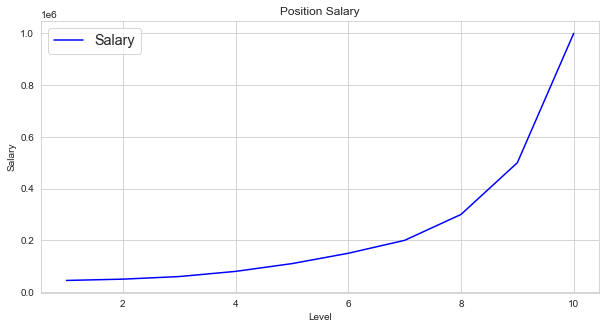

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axs = plt.subplots(figsize=(10, 5))

# Draw the line
sns.lineplot(x='Level', y='Salary', label='Salary', data=df_dataset, color='blue', ax=axs)

axs.set(title='Position Salary');
axs.legend(loc='upper left', fontsize='x-large')

## Building the Linear regression model

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lreg = LinearRegression()
lreg.fit(df_dataset[['Level']], df_dataset['Salary'])

# Make predictions
df_dataset['Salary (Predicted)'] = lreg.predict(df_dataset[['Level']])

# Regression intercept & coefficients
print('Predicted Salary = {:.1f} + {:.1f} * level'.format(lreg.intercept_, lreg.coef_[0]))

Predicted Salary = -195333.3 + 80878.8 * level


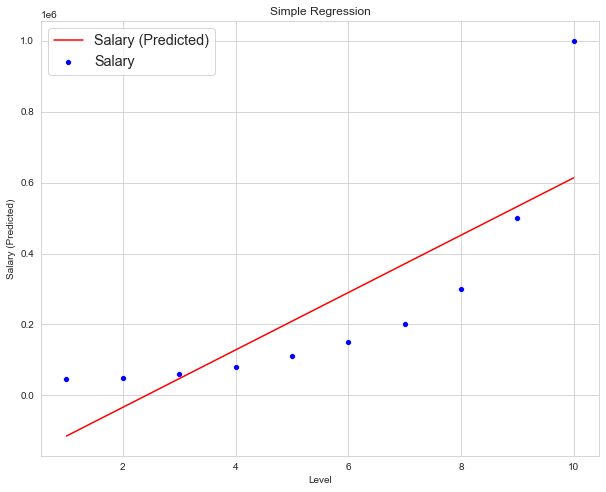

In [39]:
# Visualizing the result for Linear regression
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x='Level', y='Salary', label='Salary', data=df_dataset, color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x='Level', y='Salary (Predicted)', label='Salary (Predicted)', data=df_dataset, color="red", ax=axs)

axs.set(title='Simple Regression');
axs.legend(loc='upper left', fontsize='x-large')

## In the above output image, we can clearly see that the regression line is so far from the datasets. Predictions are in a red straight line,
## and blue points are actual values. So we need a curved model to fit the dataset other than a straight line.

## Building the Polynomial regression model

In [26]:
# Polynomial Regression, degree=3
from sklearn.preprocessing import PolynomialFeatures

x_dataset = df_dataset[['Level']]
y_dataset  = df_dataset[['Salary']]

# degree=3 to get both the quadratic and cubic feature transformation
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x_dataset)
x_poly3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [27]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_dataset.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly3.get_feature_names_out()
]

x_poly3n = pd.DataFrame(x_poly3, columns=poly_features)

In [29]:
x_poly3n

,1,Level,Level^2,Level^3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0
5,1.0,6.0,36.0,216.0
6,1.0,7.0,49.0,343.0
7,1.0,8.0,64.0,512.0
8,1.0,9.0,81.0,729.0
9,1.0,10.0,100.0,1000.0


In [35]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(x_poly3n, y_dataset)

x_poly3n['Salary (Predicted)'] = lreg.predict(x_poly3n)

In [36]:
x_poly3n

,1,Level,Level^2,Level^3,Salary (Predicted)
0,1.0,1.0,1.0,1.0,14902.097902
1,1.0,2.0,4.0,8.0,78759.906760
2,1.0,3.0,9.0,27.0,94960.372960
3,1.0,4.0,16.0,64.0,88223.776224
4,1.0,5.0,25.0,125.0,83270.396270
5,1.0,6.0,36.0,216.0,104820.512820
6,1.0,7.0,49.0,343.0,177594.405594
7,1.0,8.0,64.0,512.0,326312.354312
8,1.0,9.0,81.0,729.0,575694.638695
9,1.0,10.0,100.0,1000.0,950461.538461


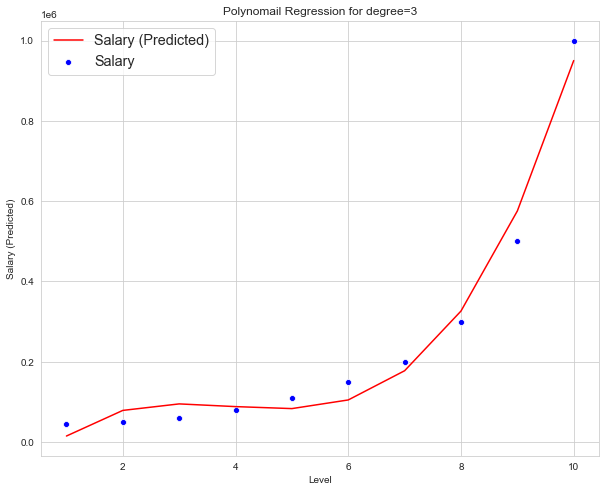

In [40]:
# Visualizing the result for polynomial regression, degree=3
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x='Level', y='Salary', label='Salary', data=df_dataset, color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x='Level', y='Salary (Predicted)', label='Salary (Predicted)', data=x_poly3n, color="red", ax=axs)

axs.set(title='Polynomail Regression for degree=3');
axs.legend(loc='upper left', fontsize='x-large')

## As we can see in the above output image, the predictions are close to the real values. The above plot will vary as we will change the degree.

In [41]:
# Polynomial Regression, degree=4
from sklearn.preprocessing import PolynomialFeatures

# degree=4 to get both the quadratic and cubic feature transformation
poly4 = PolynomialFeatures(degree=4)
x_poly4 = poly4.fit_transform(x_dataset)
x_poly4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [42]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_dataset.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in poly4.get_feature_names_out()
]

x_poly4n = pd.DataFrame(x_poly4, columns=poly_features)

In [43]:
x_poly4n

,1,Level,Level^2,Level^3,Level^4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [44]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(x_poly4n, y_dataset)

x_poly4n['Salary (Predicted)'] = lreg.predict(x_poly4n)

In [45]:
x_poly4n

,1,Level,Level^2,Level^3,Level^4,Salary (Predicted)
0,1.0,1.0,1.0,1.0,1.0,53356.643357
1,1.0,2.0,4.0,8.0,16.0,31759.906760
2,1.0,3.0,9.0,27.0,81.0,58642.191142
3,1.0,4.0,16.0,64.0,256.0,94632.867133
4,1.0,5.0,25.0,125.0,625.0,121724.941725
5,1.0,6.0,36.0,216.0,1296.0,143275.058275
6,1.0,7.0,49.0,343.0,2401.0,184003.496503
7,1.0,8.0,64.0,512.0,4096.0,289994.172494
8,1.0,9.0,81.0,729.0,6561.0,528694.638695
9,1.0,10.0,100.0,1000.0,10000.0,988916.083916


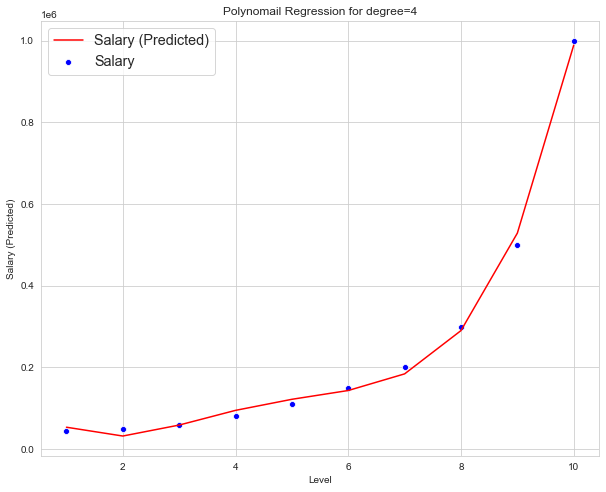

In [46]:
# Visualizing the result for polynomial regression, degree=4
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x='Level', y='Salary', label='Salary', data=df_dataset, color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x='Level', y='Salary (Predicted)', label='Salary (Predicted)', data=x_poly4n, color="red", ax=axs)

axs.set(title='Polynomail Regression for degree=4');
axs.legend(loc='upper left', fontsize='x-large')

## If we change the degree=4, then we will give a more accurate plot, as shown in the below image.
## Hence we can get more accurate results by increasing the degree of Polynomial.